In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Check the number of rows and columns
df.shape

(569, 33)

In [7]:
# Generate descriptive statistics of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# now lets look at the type of data we have. We can use 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# now we can drop this column Unnamed: 32
df.drop("Unnamed: 32",axis=1,inplace=True)

In [12]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
# like this we also don't want the Id column for our analysis
df.drop("id",axis=1,inplace=True)

In [25]:
# Function to fit label encoder
def label_encoder_fit(x):
    unique_values = np.unique(x)
    labels = {value: i for i, value in enumerate(unique_values)}
    return labels

In [26]:
# Function to transform labels using the fitted encoder
def label_encoder_transform(x, labels):
    return [labels[value] for value in x]

In [27]:
# Apply label encoding to object columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        labels = label_encoder_fit(df[column])
        label_encoders[column] = labels
        df[column] = label_encoder_transform(df[column], labels)
        
# Print the label encoders
label_encoders

{'diagnosis': {'B': 0, 'M': 1}}

In [28]:
# Feature scaling function
def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

In [34]:
import random
# Split the data into training and test sets
def train_test_split(df, test_ratio):
    num_rows = df.shape[0]
    num_test_rows = int(num_rows * test_ratio)
    test_indices = random.sample(range(num_rows), num_test_rows)
    test_set = df.iloc[test_indices]
    train_set = df.drop(test_indices)
    return train_set, test_set

In [35]:
# Perform train-test split
train, test = train_test_split(df, 0.3)

In [36]:
# Separate features and labels for training set
X_train = train.drop(columns=['diagnosis']).values
Y_train = train["diagnosis"].values

# Separate features and labels for test set
X_test = test.drop(columns=['diagnosis']).values
Y_test = test["diagnosis"].values

# Scale the features
X_train = feature_scaling(X_train)
X_test = feature_scaling(X_test)

In [37]:
# Logistic regression functions
def predict(X,W,b):
    return W.dot(X)+b

In [38]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [39]:
def cost(W,b):
    m,n = X_train.shape
    cost = 0
    for i in range(m):
        fx = sigmoid(predict(X_train[i], W, b))
        cost += Y_train[i]*np.log(fx)+(1-Y_train[i])*np.log(1-fx)
    cost = -cost/m
    return cost

In [40]:
def gradient_step(W, b):
    m,n = X_train.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        fx = sigmoid(predict(X_train[i], W, b))
        for j in range(n):
            dj_dw[j] += (fx - Y_train[i]) * X_train[i][j]
        dj_db += fx - Y_train[i]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return [dj_dw, dj_db]

In [41]:
def gradient_decent(alpha, iterations, init_W, init_b, record_interval):
    local_W = init_W
    local_b = init_b
    cost_history = [cost(local_W, local_b)]
    for i in range(iterations):
        new_W, new_b = gradient_step(local_W, local_b)
        local_W = local_W - (alpha*new_W)
        local_b = local_b - (alpha*new_b)
        if i%record_interval==0:
            local_cost = cost(local_W, local_b)
            print(f"Iteration {i}: Cost = {local_cost}")
            cost_history.append(local_cost)
    return [local_W, local_b, cost_history]

In [42]:
# Set initial weights and hyperparameters
m, n = X_train.shape
W = np.zeros((n,))
b = 0
alpha = 0.001  # Learning rate
iterations = 20000 # Number of iterations
variable_frequency = 1000 # Frequency to record cost

# Perform gradient descent
W, b, cost_history = gradient_decent(alpha, iterations, W, b,variable_frequency)

# Print the final weights and bias
print('Final weights:')
print(W)
print('Final bias:')
print(b)

Iteration 0: Cost = 0.6910567553602419
Iteration 1000: Cost = 0.24125823672319494
Iteration 2000: Cost = 0.17791661261880906
Iteration 3000: Cost = 0.14926303152179488
Iteration 4000: Cost = 0.13228709847661455
Iteration 5000: Cost = 0.1208038427628644
Iteration 6000: Cost = 0.1123871336192913
Iteration 7000: Cost = 0.10587884470900058
Iteration 8000: Cost = 0.10065104767120213
Iteration 9000: Cost = 0.09633104986237431
Iteration 10000: Cost = 0.0926821691658025
Iteration 11000: Cost = 0.08954601029858761
Iteration 12000: Cost = 0.08681205268949718
Iteration 13000: Cost = 0.08440051702065592
Iteration 14000: Cost = 0.08225217200417116
Iteration 15000: Cost = 0.08032198975223233
Iteration 16000: Cost = 0.07857504338420324
Iteration 17000: Cost = 0.07698376683431037
Iteration 18000: Cost = 0.07552607249669448
Iteration 19000: Cost = 0.07418402619071254
Final weights:
[ 0.45943066  0.47196479  0.45125793  0.45983743  0.14233787  0.12047363
  0.35037887  0.44642139  0.09556801 -0.21830199 

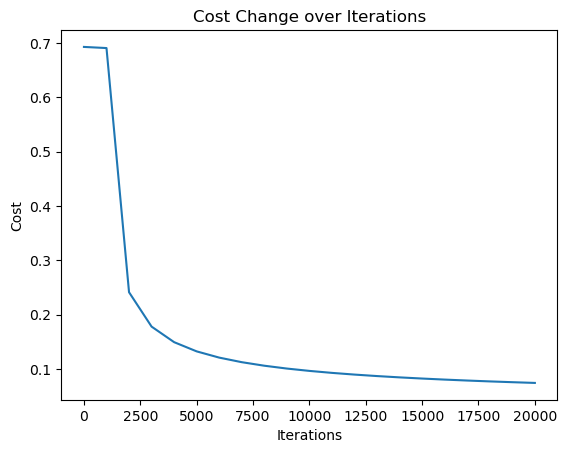

In [43]:
# Plot the cost change over iterations
plt.plot(range(0, iterations + 1, variable_frequency), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Change over Iterations')
plt.show()

In [44]:
# Make predictions on the test set
linear_combination = np.dot(X_test, W) + b
probabilities = sigmoid(linear_combination)
predictions = np.where(probabilities >= 0.4, 1, 0)
accuracy = np.mean(predictions == Y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 95.88235294117648 %
